In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/series/"

SIZE = 10000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"

datafiles = [
    "costs_run|2025-05-28/data.json",
]

In [3]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)

ratios: [100.0]
patch recovery: [0.001]
max costs: [1.25 1.5 2.0 3.0 5.0 9.0 17.0 33.0]
boundary conditions: ['SOLID']
num locations: [10]
random walker seeds: 1
random locations seeds: 1
patch recovery logic: ['LINEAR']


In [4]:
df.columns

Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'ratio'],
      dtype='object')

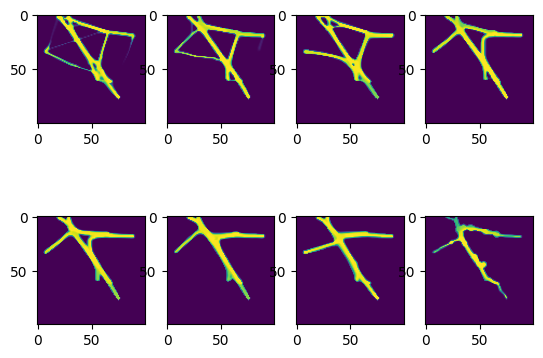

In [7]:
util.plot_patches(df[(df["steps"] == 5000) & (df["settings.randomSeedLocations"] == 1) & (df["settings.randomSeedWalkers"] == 1)]);

0


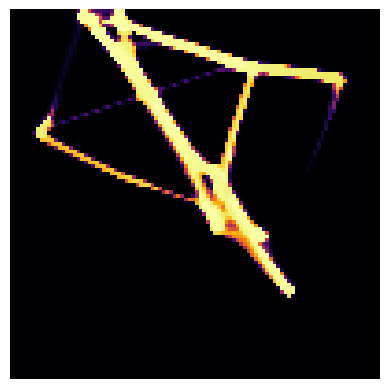

1


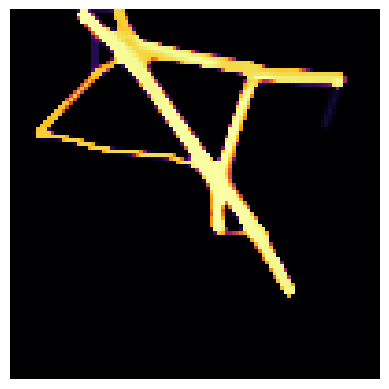

2


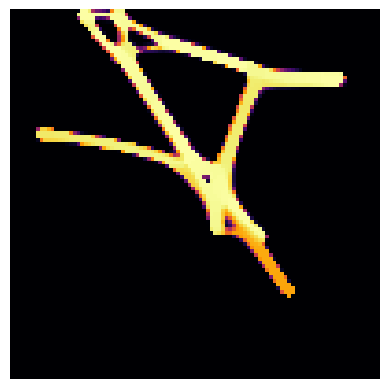

3


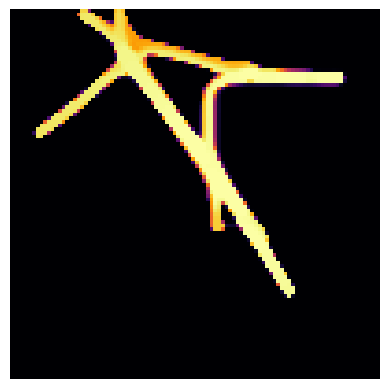

4


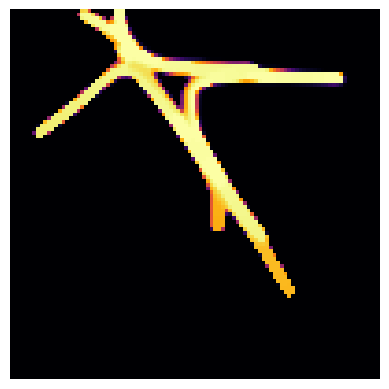

5


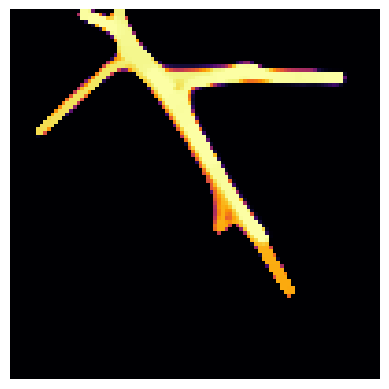

6


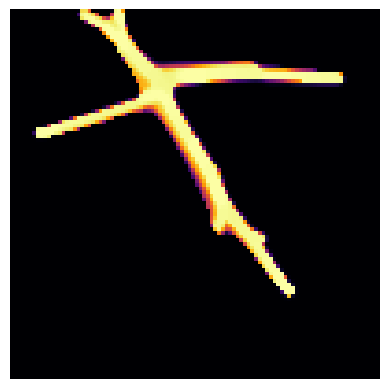

7


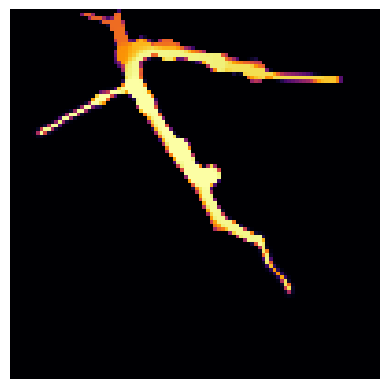

In [11]:
_df = df[(df["steps"] == 5000) & (df["settings.randomSeedLocations"] == 1) & (df["settings.randomSeedWalkers"] == 1)]
for i in range(len(_df)):
    print(i)
    plt.imshow(np.reshape(_df["patches"].iloc[i], (100, 100)), cmap="inferno")
    plt.axis('off')
    plt.show()

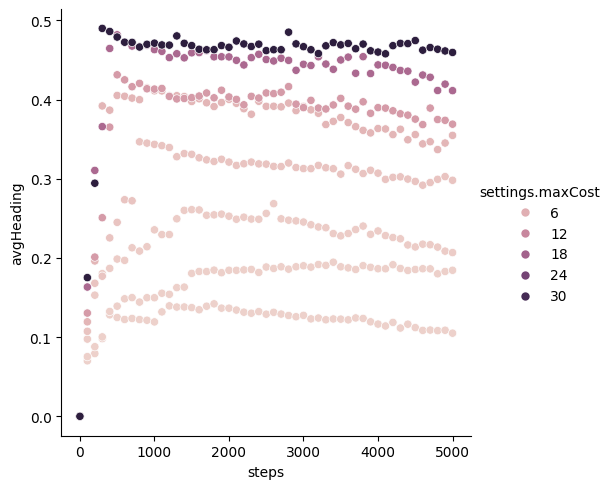

In [35]:
sns.relplot(data=df, y="avgHeading", x="steps", hue="settings.maxCost")

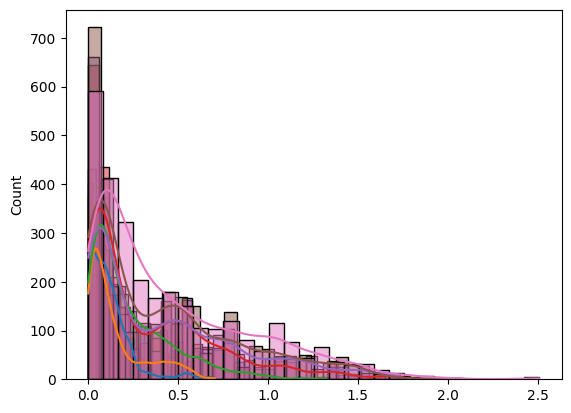

In [59]:
for i in range(7):
    headings = df[df["steps"] == 1000].iloc[i]["weightedHeadings"]
    sns.histplot(x=[h[0] for h in headings], weights=[h[1] for h in headings], bins=30, kde=True)
